In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n = 25
Xn = np.random.exponential(size=n)

In [3]:
X = np.sort(Xn)
print("Xn:", Xn, "\n\nВариационный ряд (упорядоченная выборка)\nX:",X)

Xn: [2.0795264  4.02123001 0.67750467 0.63714997 0.42295498 0.26705428
 0.04832129 0.35945976 0.19822418 0.48769207 0.0969769  1.65539033
 0.35268048 1.19706773 1.63563678 0.03339281 0.60089839 0.59112449
 0.84951239 0.18045799 0.64853452 0.01660073 1.40151879 0.51908916
 1.1936678 ] 

Вариационный ряд (упорядоченная выборка)
X: [0.01660073 0.03339281 0.04832129 0.0969769  0.18045799 0.19822418
 0.26705428 0.35268048 0.35945976 0.42295498 0.48769207 0.51908916
 0.59112449 0.60089839 0.63714997 0.64853452 0.67750467 0.84951239
 1.1936678  1.19706773 1.40151879 1.63563678 1.65539033 2.0795264
 4.02123001]


In [4]:
md = "Все числа в Xn" # FIXME

s = f'''Мода:\t\t{md}
Медиана: \t{X[n//2]}
Размах: \t{X.max()-X.min()}
К. ассиметрии: \t{(((X-X.mean())**3).sum()/n)/np.var(X)**(3/2)}
'''
print(s)
#print((X-X.mean()), (X-X.mean())**3, (X-X.mean())[0]**3)

Мода:		Все числа в Xn
Медиана: 	0.5911244924302416
Размах: 	4.004629277858294
К. ассиметрии: 	2.18166103331238



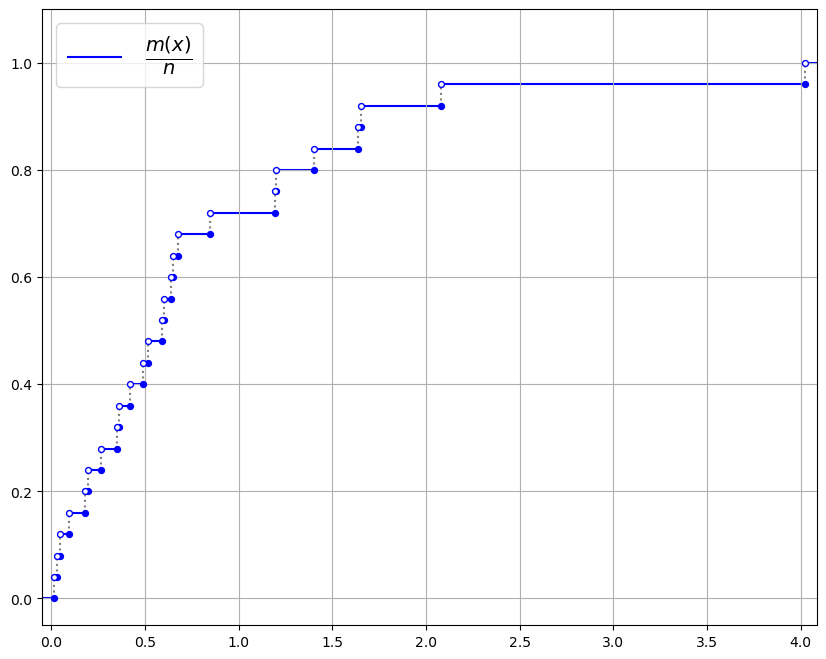

In [5]:
y=[(i+1)/n for i in range(n)]
Xtmp = np.zeros(len(y)+2)
Xtmp[1:n+1] = X
Xtmp[-1]=X[-1]+3*X.mean()
Xtmp[0]=-1
yn = np.insert(y, 0, 0)

fig, ax = plt.subplots(figsize=(10, 8))
ax.set_facecolor('white')

# https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.hlines.html
ax.hlines(y=yn, xmin=Xtmp[:-1], xmax=Xtmp[1:], color='blue', zorder=1)

# https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.vlines.html
ax.vlines(x=Xtmp[1:-1], ymin=yn[:-1], ymax=yn[1:], color='gray',
          linestyle='dotted', zorder=1)

ax.scatter(Xtmp[1:-1], yn[:-1], color='blue', s=18, zorder=2)
ax.scatter(Xtmp[1:-1], y, color='white', s=18, zorder=2,
           edgecolor='blue')
ax.set_xlim(-0.05, X[-1]+2*X.mean()/n)
ax.grid(True)
ax.legend([r"$\frac{m(x)}{n}$"],loc=2,fontsize=20)
ax.set_ylim([-0.05, 1.1])
plt.show()

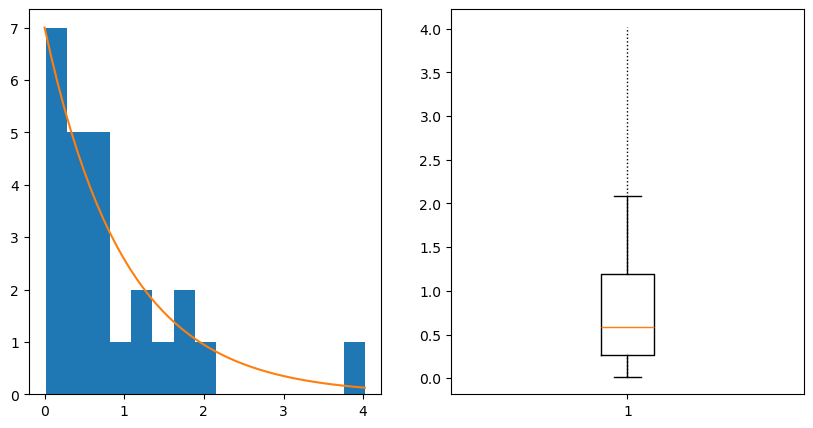

In [6]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))
bds=int(X[-1]+1)*3
ax1.hist(X, bins=bds)
x = np.linspace(0, X[-1])
ax1.plot(x,np.exp(-x)*np.sum(X<X[0]+X[-1]/bds))



ax2.plot([1,1],[X[3*n//4],X[-1]],linestyle='dotted',linewidth=1, color="black")
ax2.plot([1,1],[X[0],X[n//4]],linestyle='dotted',linewidth=1, color="black")
box=ax2.boxplot(X,showfliers=False)
#     q1-1.5Eps   q1   median  q2   q2+1.5Eps
#                  |-----:-----|
#  o      |--------|     :     |--------|    o
# min              |-----:-----|            max
#                  <----------->           
#                       Eps
plt.show()

In [7]:
!fortune

"... I should explain that I was wearing a black velvet cape that was
supposed to make me look like the dashing, romantic Zorro but which actually
made me look like a gigantic bat wearing glasses ..."
		-- Dave Barry, "The Wet Zorro Suit and Other Turning
		   Points in l'Amour"


In [8]:
bootsrapcnt = 50000
mu = 1
sigm = 1/5

In [9]:
bsX = X[np.random.choice(len(X), size=(bootsrapcnt, len(X)))]

means = np.mean(bsX, axis=1)

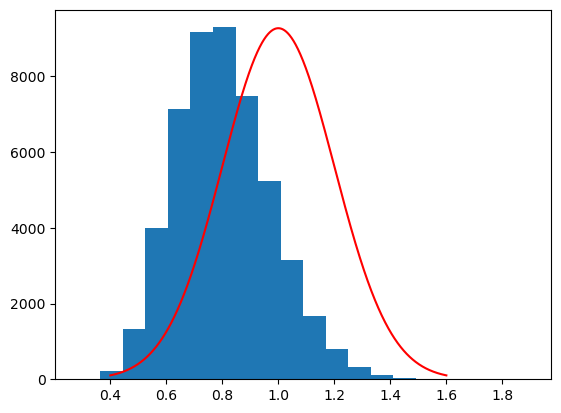

In [10]:
hist=plt.hist(means,bins=20)
x = np.linspace(mu - 3 * sigm, mu + 3 * sigm, 1000)
y = np.exp(-(x-mu)**2/(2*sigm**2))/(sigm*np.sqrt(np.pi*2))*max(hist[0])/2
plt.plot(x,
         y,
         label="Нормальное распределение\n μ=1, σ²=1/25",
         color='red')

In [11]:
Kasses = []
m=0
for i in bsX:
    a = (((i-i.mean())**3).sum()/n)/np.var(i)**(3/2)
    Kasses.append(a)
    if a<1.:
        m+=1



Оценка вероятности того, что к. ассиметрии будет меньше 1 равен 0.23412


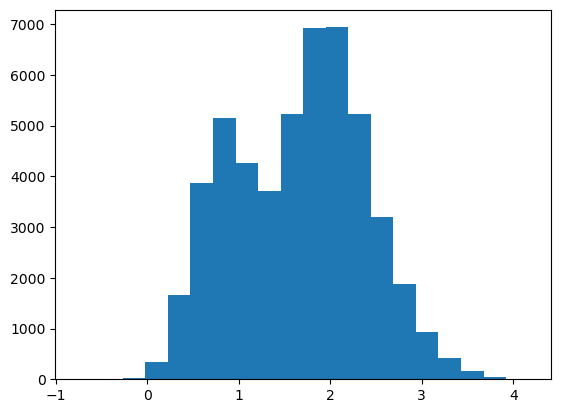

In [12]:
plt.hist(Kasses,bins=20)
print("Оценка вероятности того, что к. ассиметрии будет меньше 1 равен",
      m/bootsrapcnt)

In [13]:
medians = []
m=0
for i in bsX:
    medians.append(np.median(i))

(array([1.0000e+00, 1.0200e+02, 3.6900e+02, 3.1720e+03, 4.0620e+03,
        1.3255e+04, 1.5452e+04, 1.2099e+04, 0.0000e+00, 9.8800e+02,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 4.8800e+02,
        0.0000e+00, 1.1000e+01, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([0.0969769 , 0.1739099 , 0.25084289, 0.32777588, 0.40470888,
        0.48164187, 0.55857487, 0.63550786, 0.71244085, 0.78937385,
        0.86630684, 0.94323984, 1.02017283, 1.09710582, 1.17403882,
        1.25097181, 1.32790481, 1.4048378 , 1.48177079, 1.55870379,
        1.63563678]),
 <BarContainer object of 20 artists>)

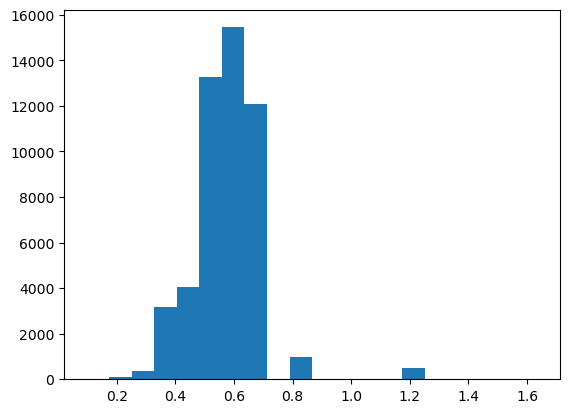

In [14]:
plt.hist(medians,bins=20)